In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

alpha=0.7

In [2]:
all_stats = []

baseline = 'DATA/stats'
categories = os.listdir(baseline)
categories.sort()
for i in range(len(categories)):
    variants = os.listdir(os.path.join(baseline, categories[i]))
    all_stats.append([])
    for j in range(len(variants)):
        trials = os.listdir(os.path.join(baseline, categories[i], variants[j]))
        for k in range(len(trials)):
            stat = np.load(os.path.join(baseline, categories[i], variants[j], trials[k]), allow_pickle=True)
            all_stats[i].append(stat)
all_stats = np.array(all_stats)

In [3]:
correlation_ppvs = np.mean(all_stats.transpose()[0].tolist(), axis=0)
correlation_tprs = np.mean(all_stats.transpose()[1].tolist(), axis=0)
correlation_aurocs = np.mean(all_stats.transpose()[2].tolist(), axis=0)
correlation_auprs = np.mean(all_stats.transpose()[3].tolist(), axis=0)
correlation_snrs = np.mean(all_stats.transpose()[4].tolist(), axis=0)
significance = np.mean(all_stats.transpose()[5].tolist(), axis=0)

correlation_auroc_stds = np.std(all_stats.transpose()[2].tolist(), axis=0)

''

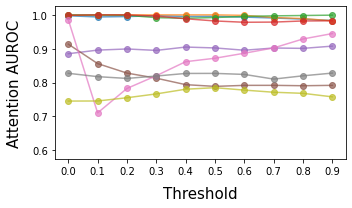

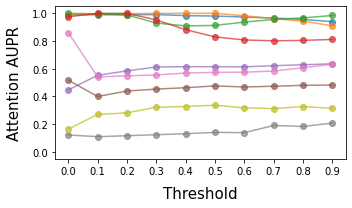

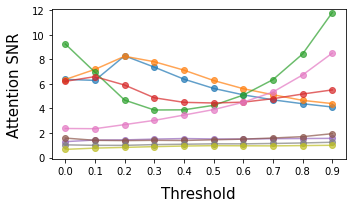

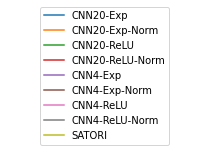

In [4]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
try:
    os.mkdir('correlation_sensitivity')
except:
    pass

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']


fig = plt.figure(figsize=(5, 3))
ax = fig.subplots(1, 1)

ax.set_ylabel('Attention AUROC', fontsize=15, labelpad=10)
ax.plot(thresholds, correlation_aurocs.transpose(), label=categories, alpha=alpha, marker='o')
ax.set_xticks(thresholds)
ax.set_ylim([0.575, 1.025])
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xlabel('Threshold', fontsize=15, labelpad=10)
"""for i in range(len(colors)):
    upper = correlation_aurocs[i].transpose()+correlation_auroc_stds[i].transpose()
    lower = correlation_aurocs[i].transpose()-correlation_auroc_stds[i].transpose()
    ax.fill_between(thresholds, upper, lower, color=colors[i], alpha=0.2)"""

fig.tight_layout()
fig.savefig('correlation_sensitivity/AUROC.pdf', dpi=300, format='pdf')


fig = plt.figure(figsize=(5, 3))
ax = fig.subplots(1, 1)

ax.set_ylabel('Attention AUPR', fontsize=15, labelpad=10)
ax.plot(thresholds, correlation_auprs.transpose(), label=categories, alpha=alpha, marker='o')
ax.set_xticks(thresholds)
ax.set_ylim([-0.05, 1.05])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('Threshold', fontsize=15, labelpad=10)

fig.tight_layout()
fig.savefig('correlation_sensitivity/AUPR.pdf', dpi=300, format='pdf')


fig = plt.figure(figsize=(5, 3))
ax = fig.subplots(1, 1)

ax.set_ylabel('Attention SNR', fontsize=15, labelpad=10)
ax.plot(thresholds, correlation_snrs.transpose(), label=categories, alpha=alpha, marker='o')
ax.set_xticks(thresholds)
ax.set_ylim([-0.1, 12.1])
ax.set_yticks(np.arange(0, 7, 1)*2)
ax.set_xlabel('Threshold', fontsize=15, labelpad=10)

fig.tight_layout()
fig.savefig('correlation_sensitivity/SNR.pdf', dpi=300, format='pdf')

fig = plt.figure(figsize=(3, 2))
ax = fig.subplots(1, 1)

ax.set_ylabel('AUPR', fontsize=15, labelpad=10)
ax.plot(thresholds, correlation_auprs.transpose(), label=categories)
ax.set_xticks(thresholds)
ax.set_ylim([-0.05, 1.05])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('Threshold', fontsize=15, labelpad=10)
fig.legend(loc='center')
ax.axis('off')
ax.lines = []

fig.tight_layout()
fig.savefig('correlation_sensitivity/legend.pdf', dpi=300, format='pdf')
;

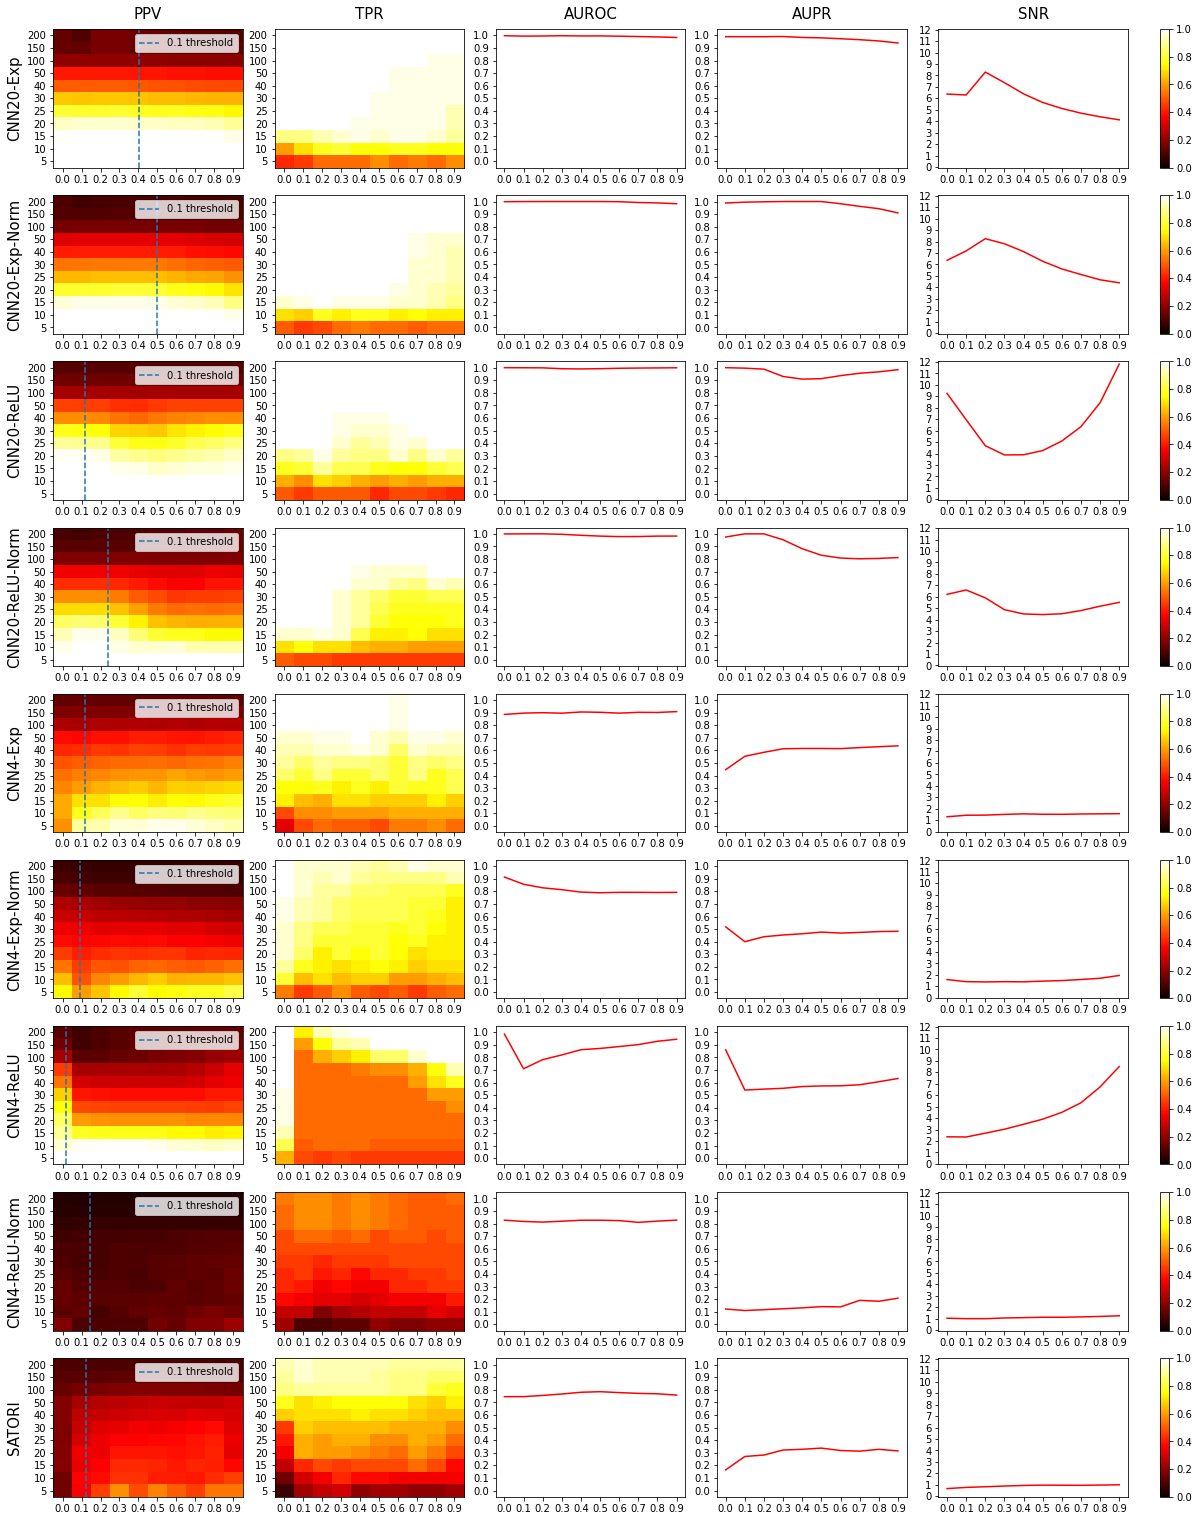

In [5]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
topNs = [5, 10, 15, 20, 25, 30, 40, 50, 100, 150, 200]

fig = plt.figure(figsize=(20, 3*correlation_ppvs.shape[0]))
ax = fig.subplots(correlation_ppvs.shape[0], 6, gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 0.05]})

color = 'hot'
smoothing = 'spline36'
smoothing = None

for i in range(ax.shape[0]):
    if i == 0:
        ax[i][0].set_title('PPV', fontsize=15, pad=10)
        ax[i][1].set_title('TPR', fontsize=15, pad=10)
        ax[i][2].set_title('AUROC', fontsize=15, pad=10)
        ax[i][3].set_title('AUPR', fontsize=15, pad=10)
        ax[i][4].set_title('SNR', fontsize=15, pad=10)
    ax[i][0].set_ylabel(categories[i], fontsize=15, labelpad=5)

    ax[i][0].set_xticks(np.arange(len(thresholds)))
    ax[i][0].set_xticklabels(thresholds)
    ax[i][0].set_yticks(np.arange(len(topNs)))
    ax[i][0].set_yticklabels(topNs[::-1], fontsize=10)
    c = ax[i][0].imshow(correlation_ppvs[i].transpose()[::-1], cmap=color, interpolation=smoothing, vmin=0, vmax=1, aspect='auto')
    ax[i][0].axvline(significance[i]*10, linestyle='--', label='0.1 threshold')
    ax[i][0].legend(loc='upper right')

    ax[i][1].set_xticks(np.arange(len(thresholds)))
    ax[i][1].set_xticklabels(thresholds)
    ax[i][1].set_yticks(np.arange(len(topNs)))
    ax[i][1].set_yticklabels(topNs[::-1], fontsize=10)
    c = ax[i][1].imshow(correlation_tprs[i].transpose()[::-1], cmap=color, interpolation=smoothing, vmin=0, vmax=1, aspect='auto')

    ax[i][2].plot(thresholds, correlation_aurocs[i], color='red')
    ax[i][2].set_xticks(thresholds)
    ax[i][2].set_ylim([-0.05, 1.05])
    ax[i][2].set_yticks(np.arange(0.0, 1.1, 0.1))

    ax[i][3].plot(thresholds, correlation_auprs[i], color='red')
    ax[i][3].set_xticks(thresholds)
    ax[i][3].set_ylim([-0.05, 1.05])
    ax[i][3].set_yticks(np.arange(0.0, 1.1, 0.1))

    ax[i][4].plot(thresholds, correlation_snrs[i], color='red')
    ax[i][4].set_xticks(thresholds)
    ax[i][4].set_ylim([-0.05, 12.05])
    ax[i][4].set_yticks(np.arange(0, 13, 1))

    fig.colorbar(c, cax=ax[i][5])

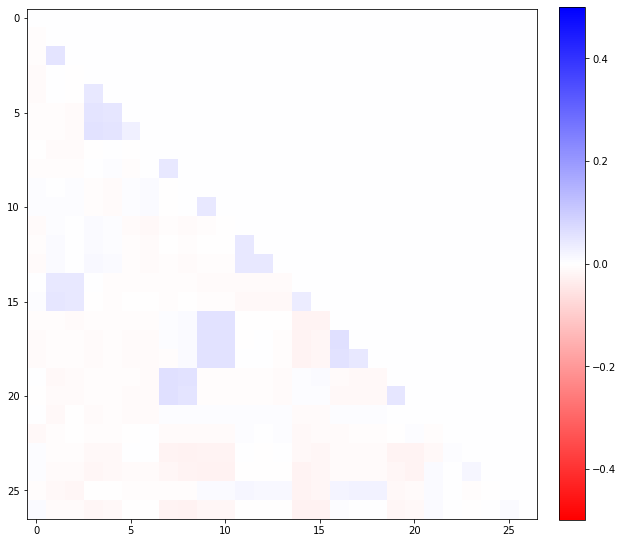

In [6]:
correlation_maps = np.array(all_stats.transpose([2, 0, 1])[7])

model = 0
threshold = 2
trial = 0

plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots()
c = ax.imshow(correlation_maps[model][trial][threshold], cmap='bwr_r', vmin=-0.5, vmax=0.5)
plt.colorbar(c, fraction=0.046, pad=0.04)